In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px

In [37]:
bike_data = pd.read_csv('202206-citbike-tripdata.csv')
bike_data

C:\Users\shahr\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,FD85DE523427365B,classic_bike,2022-06-08 18:55:00,2022-06-08 18:58:13,E 149 St & Park Ave,7884.04,Morris Ave & E 153 St,7901.04,40.818154,-73.925294,40.820036,-73.921411,member
1,E1DF44B06B360036,classic_bike,2022-06-18 16:34:50,2022-06-18 16:47:49,E 115 St & Madison Ave,7599.02,W 148 St & Amsterdam Ave,8033.09,40.798983,-73.944716,40.827075,-73.945909,member
2,72B6DBF42BC1F9E1,classic_bike,2022-06-11 17:57:00,2022-06-11 18:07:33,E 115 St & Madison Ave,7599.02,2 Ave & E 99 St,7386.10,40.798944,-73.944846,40.786259,-73.945526,member
3,5FABA5CB97A6EA64,classic_bike,2022-06-23 17:32:04,2022-06-23 17:38:36,W Broadway & Spring St,5569.06,N Moore St & Hudson St,5470.02,40.724947,-74.001659,40.719961,-74.008443,member
4,EBA54764AA1A3A41,classic_bike,2022-06-30 16:17:43,2022-06-30 16:27:58,E 14 St & 1 Ave,5779.1,5 Ave & E 29 St,6248.06,40.731393,-73.982867,40.745168,-73.986831,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432878,52758C21D58728B4,classic_bike,2022-06-25 00:45:19,2022-06-25 00:58:01,Norman St & Wyckoff Ave,4654.01,Grove St & Broadway,4526.01,40.695170,-73.903110,40.690470,-73.923511,casual
3432879,2F2B099B77266BF2,classic_bike,2022-06-21 16:52:08,2022-06-21 17:16:43,Railroad Ave & Kay Ave,4990.02,Grove St & Broadway,4526.01,40.705148,-73.970781,40.690470,-73.923511,member
3432880,AEE172A41A2FDA65,classic_bike,2022-06-29 17:58:20,2022-06-29 18:12:10,Bushwick Ave & Powers St,5250.05,S 4 St & Wythe Ave,5204.05,40.712477,-73.941000,40.712859,-73.965903,member
3432881,3E6A2E15FD49F94E,classic_bike,2022-06-16 19:31:34,2022-06-16 19:42:42,Bushwick Ave & Powers St,5250.05,S 4 St & Wythe Ave,5204.05,40.712477,-73.941000,40.712859,-73.965903,member


In [38]:
# renaming the columns
bike_data.rename(columns={"started_at":"Start Time",
"ended_at":"Stop Time",
"start_station_name":"Start Station Name",
"start_station_id":"Start Station ID",
"end_station_name":"End Station Name",
"end_station_id":"End Station ID",
"start_lat":"Start Station Latitude",
"start_lng":"Start Station Longitude",
"end_lat":"End Station Latitude",
"end_lng":"End Station Longitude",}, inplace=True)

In [39]:
# drop all null values
bike_data.dropna(how='any', inplace=True)

In [40]:
# few values were str and few int, so changed all to str
bike_data['Start Station ID'] = bike_data['Start Station ID'].astype(str)
bike_data['End Station ID'] = bike_data['End Station ID'].astype(str)

In [41]:
# to DateTime data format
bike_data['Start Time'] = pd.to_datetime(bike_data['Start Time'])
bike_data['Stop Time'] = pd.to_datetime(bike_data['Stop Time'])
bike_data['Day'] = bike_data['Start Time'].dt.weekday
bike_data['Day'] # Monday = 0, Sunday = 6
bike_data["hour"] = bike_data["Start Time"].map(lambda x: x.hour)

In [42]:
# Various operations in date format
bike_data['Time'] = (bike_data['Stop Time'] - bike_data['Start Time'])
bike_data['Time'] =  bike_data['Time'].dt.total_seconds()
bike_data['Minutes'] = (bike_data['Time']/60).astype('int32')
bike_data['Hours'] = (bike_data['Time']/(60*60)).astype('int32')

In [82]:
#removing the ride_id column as it is unique for every trip
duplicates = bike_data.duplicated(subset=bike_data.columns[1:], keep='first')
bike_data.insert(len(bike_data.columns), "duplicate", duplicates, allow_duplicates = True)
print("Found {} duplicate rows".format(len(bike_data[duplicates])))
bike_data.drop(duplicates[duplicates==True].index,inplace = True)

Found 0 duplicate rows


[]

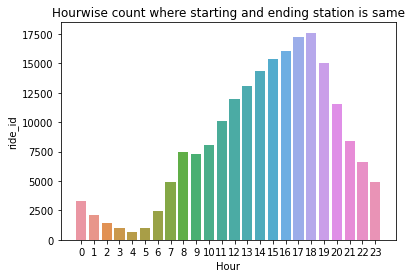

In [63]:
# Hourwise count where starting and ending station is same
ax = sns.barplot(x=bike_data[bike_data['Start Station Name']==bike_data['End Station Name']].groupby('hour').count()['ride_id'].index,
                y=bike_data[bike_data['Start Station Name']==bike_data['End Station Name']].groupby('hour').count()['ride_id'])
plt.title("Hourwise count where starting and ending station is same")
plt.xlabel("Hour")
plt.ylabel("ride_id")
plt.plot()

In [64]:
bike_data.groupby(['rideable_type']).count().iloc[:,0]

rideable_type
classic_bike     2519696
docked_bike        35422
electric_bike     871289
Name: ride_id, dtype: int64

Text(0, 0.5, 'Count')

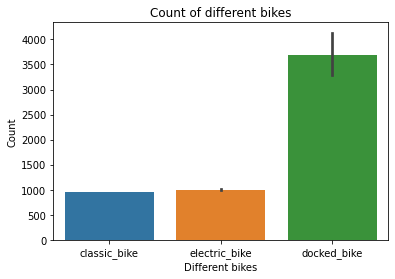

In [65]:
sns.barplot(x='rideable_type',
            y='Time',
            data=bike_data)
plt.title("Count of different bikes")
plt.xlabel("Different bikes")
plt.ylabel("Count")
plt.plot()

In [66]:
bike_data.groupby(['member_casual']).count().iloc[:,0]

member_casual
casual     830230
member    2596177
Name: ride_id, dtype: int64

[]

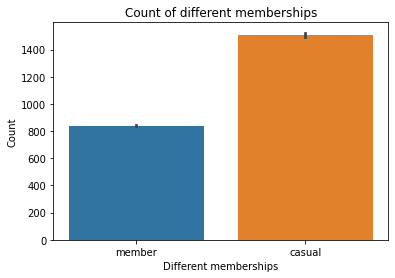

In [68]:
sns.barplot(x='member_casual',
            y='Time',
            data=bike_data)
plt.title("Count of different memberships")
plt.xlabel("Different memberships")
plt.ylabel("Count")
plt.plot()


In [49]:
px.bar(x=bike_data["hour"].value_counts().index,
       y=bike_data["hour"].value_counts().values,
       title = "Count",
       labels={'x':'Time',"y":"Number of people using bike"})

[]

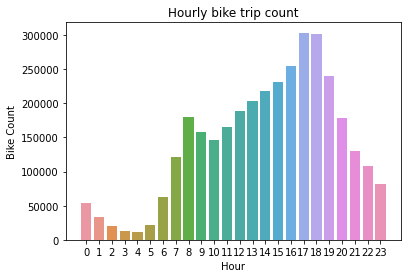

In [81]:
ax=sns.barplot(x=bike_data["hour"].value_counts().index,
            y=bike_data["hour"].value_counts().values)
plt.title("Hourly bike trip count")
plt.xlabel("Hour")
plt.ylabel("Bike Count")
plt.plot()

In [73]:
px.bar(x=bike_data["Start Station Name"].value_counts().index,
       y=bike_data["Start Station Name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"},
       title="Bike count departure per station")

In [72]:
px.bar(x=bike_data["End Station Name"].value_counts().index,
       y=bike_data["End Station Name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"},
       title="Bike count arrival per station")

In [53]:
trips_df = pd.DataFrame()
trips_df = bike_data.groupby(['Start Station Name','End Station Name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["Start Station Name"] = trips_df["Start Station Name"].astype(str)
trips_df["End Station Name"] = trips_df["End Station Name"].astype(str)
trips_df["Routes"] = trips_df["Start Station Name"] + " to " + trips_df["End Station Name"]
trips_df.head(10)

,Start Station Name,End Station Name,Number of Trips,Routes
125700,Central Park S & 6 Ave,Central Park S & 6 Ave,1839,Central Park S & 6 Ave to Central Park S & 6 Ave
251273,Grant Ave & E 169 St,Grant Ave & E 169 St,1301,Grant Ave & E 169 St to Grant Ave & E 169 St
58227,7 Ave & Central Park South,7 Ave & Central Park South,1260,7 Ave & Central Park South to 7 Ave & Central ...
351270,Roosevelt Island Tramway,Roosevelt Island Tramway,1226,Roosevelt Island Tramway to Roosevelt Island T...
359551,Soissons Landing,Soissons Landing,1080,Soissons Landing to Soissons Landing
461465,Yankee Ferry Terminal,Yankee Ferry Terminal,1079,Yankee Ferry Terminal to Yankee Ferry Terminal
245674,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,1033,Grand Army Plaza & Central Park S to Grand Arm...
11367,12 Ave & W 40 St,12 Ave & W 40 St,1028,12 Ave & W 40 St to 12 Ave & W 40 St
451795,West St & Chambers St,West St & Chambers St,942,West St & Chambers St to West St & Chambers St
108650,Broadway & W 58 St,Broadway & W 58 St,893,Broadway & W 58 St to Broadway & W 58 St


In [54]:
trips_df[trips_df['Start Station Name']!=trips_df['End Station Name']].head(10)

,Start Station Name,End Station Name,Number of Trips,Routes
461458,Yankee Ferry Terminal,Soissons Landing,771,Yankee Ferry Terminal to Soissons Landing
327197,Old Slip & South St,South St & Gouverneur Ln,710,Old Slip & South St to South St & Gouverneur Ln
359560,Soissons Landing,Yankee Ferry Terminal,697,Soissons Landing to Yankee Ferry Terminal
333866,Pier 40 - Hudson River Park,West St & Chambers St,604,Pier 40 - Hudson River Park to West St & Chamb...
3634,1 Ave & E 62 St,1 Ave & E 68 St,598,1 Ave & E 62 St to 1 Ave & E 68 St
351274,Roosevelt Island Tramway,Southpoint Park,595,Roosevelt Island Tramway to Southpoint Park
451596,West St & Chambers St,Pier 40 - Hudson River Park,592,West St & Chambers St to Pier 40 - Hudson Rive...
403048,W 21 St & 6 Ave,9 Ave & W 22 St,582,W 21 St & 6 Ave to 9 Ave & W 22 St
351263,Roosevelt Island Tramway,Motorgate,576,Roosevelt Island Tramway to Motorgate
344919,River Ter & Warren St,Vesey Pl & River Terrace,564,River Ter & Warren St to Vesey Pl & River Terrace


In [55]:
#Percentage of tripps starting and ending at same station
(trips_df[trips_df['Start Station Name']==trips_df['End Station Name']].sum()['Number of Trips']/trips_df['Number of Trips'].sum())*100

5.894104232217598